<a href="https://colab.research.google.com/github/gs1charancharan/masai/blob/main/Fixing_Bad_Boys_in_Town.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/021/299/original/final_vg1_-_final_vg_%281%29.csv?1670840166 -O vgsales.csv

--2025-12-11 14:38:31--  https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/021/299/original/final_vg1_-_final_vg_%281%29.csv?1670840166
Resolving d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)... 52.85.30.42, 52.85.30.49, 52.85.30.133, ...
Connecting to d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)|52.85.30.42|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2041483 (1.9M) [text/plain]
Saving to: ‘vgsales.csv’

vgsales.csv         100%[===================>]   1.95M  12.0MB/s    in 0.2s    

2025-12-11 14:38:32 (12.0 MB/s) - ‘vgsales.csv’ saved [2041483/2041483]



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv("vgsales.csv")
data.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,2061,1942,NES,1985.0,Shooter,Capcom,4.569217,3.033887,3.439352,1.991671,12.802935
1,9137,¡Shin Chan Flipa en colores!,DS,2007.0,Platform,505 Games,2.076955,1.493442,3.033887,0.394830,7.034163
2,14279,.hack: Sekai no Mukou ni + Versus,PS3,2012.0,Action,Namco Bandai Games,1.145709,1.762339,1.493442,0.408693,4.982552
3,8359,.hack//G.U. Vol.1//Rebirth,PS2,2006.0,Role-Playing,Namco Bandai Games,2.031986,1.389856,3.228043,0.394830,7.226880
4,7109,.hack//G.U. Vol.2//Reminisce,PS2,2006.0,Role-Playing,Namco Bandai Games,2.792725,2.592054,1.440483,1.493442,8.363113


In [ ]:
top3_gen = data['Genre'].value_counts().index[:3]
top3_pub = data['Publisher'].value_counts().index[:3]
top3_plat= data['Platform'].value_counts().index[:3]

top3_data = data.loc[(data["Publisher"].isin(top3_pub)) & (data["Platform"].isin(top3_plat)) & (data['Genre'].isin(top3_gen))]
top3_data

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
2,14279,.hack: Sekai no Mukou ni + Versus,PS3,2012.0,Action,Namco Bandai Games,1.145709,1.762339,1.493442,0.408693,4.982552
13,2742,[Prototype 2],PS3,2012.0,Action,Activision,3.978349,3.727034,0.848807,2.792725,11.447989
16,1604,[Prototype],PS3,2009.0,Action,Activision,4.569217,4.108402,1.187272,3.339269,13.181205
19,1741,007: Quantum of Solace,PS3,2008.0,Action,Activision,4.156030,4.346074,1.087977,3.390562,12.980643
21,4501,007: Quantum of Solace,PS2,2008.0,Action,Activision,3.228043,2.738800,2.585598,3.652926,11.780257
...,...,...,...,...,...,...,...,...,...,...,...
16438,14938,Yes! Precure 5 Go Go Zenin Shu Go! Dream Festival,DS,2008.0,Action,Namco Bandai Games,1.087977,0.592445,1.087977,0.394830,3.509168
16479,10979,Young Justice: Legacy,PS3,2013.0,Action,Namco Bandai Games,2.186589,1.087977,3.409089,0.394830,7.359902
16601,11802,ZhuZhu Pets: Quest for Zhu,DS,2011.0,Misc,Activision,2.340740,1.525543,3.103825,0.394830,7.372592
16636,9196,Zoobles! Spring to Life!,DS,2011.0,Misc,Activision,2.697415,1.087977,2.760718,0.394830,6.915540


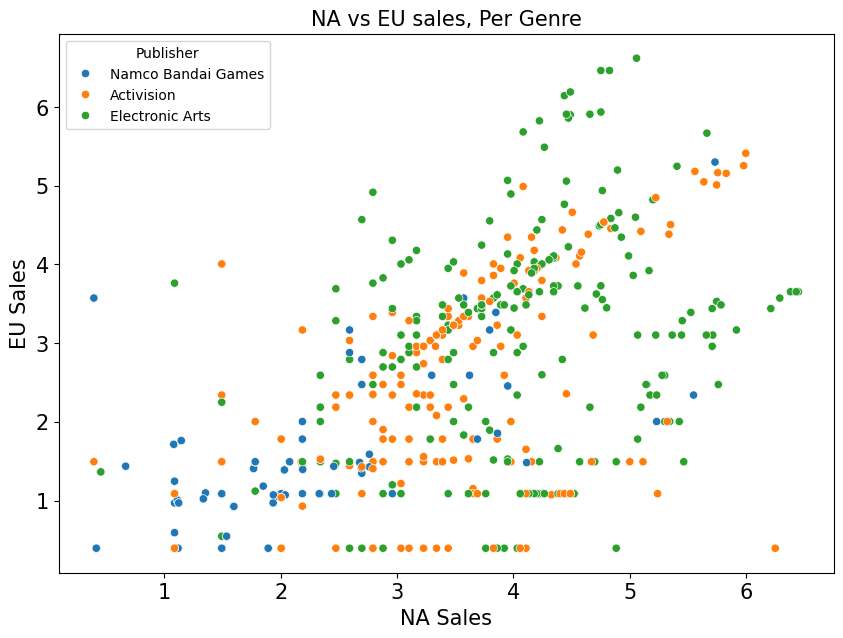

In [ ]:
plt.figure(figsize=(10,7))
sns.scatterplot(x='NA_Sales',y='EU_Sales',hue='Publisher',data=top3_data)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel("NA Sales",fontsize=15)
plt.ylabel("EU Sales",fontsize=15)
plt.title("NA vs EU sales, Per Genre",fontsize=15)
plt.show()

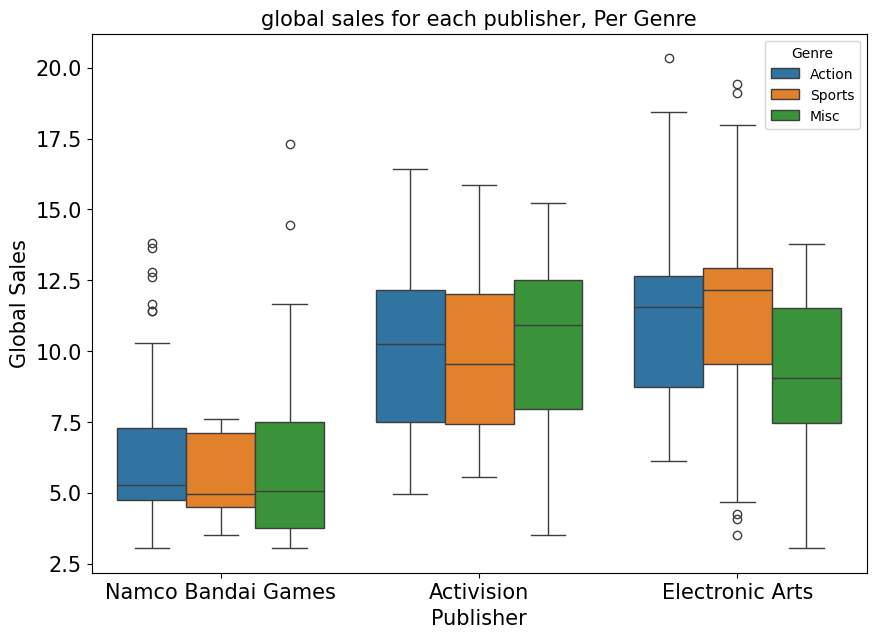

In [ ]:
#How will you visualize the global sales for each publisher, but separated by genres?
# C.=Pub,genre       N.=sale

plt.figure(figsize=(10,7))
sns.boxplot(x='Publisher',y='Global_Sales',hue='Genre',data=top3_data)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel("Publisher",fontsize=15)
plt.ylabel("Global Sales",fontsize=15)
plt.title("global sales for each publisher, Per Genre",fontsize=15)
plt.show()

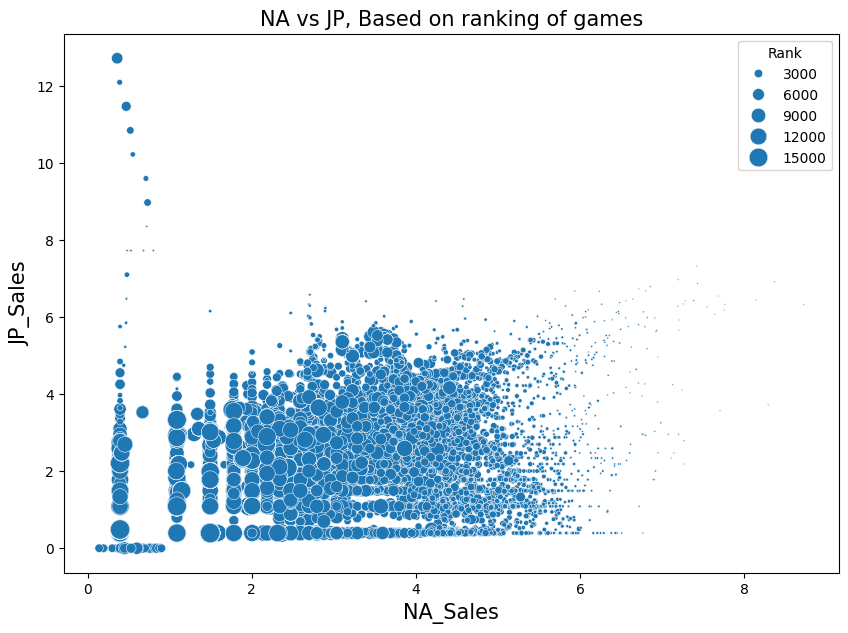

In [ ]:
#How does rank affect the correlation between NA and JP Sales?
plt.figure(figsize=(10,7))
sns.scatterplot(x='NA_Sales',y='JP_Sales',size='Rank',sizes=(1,200),data=data)
plt.xlabel("NA_Sales",fontsize=15)
plt.ylabel("JP_Sales",fontsize=15)
plt.title("NA vs JP, Based on ranking of games",fontsize=15)
plt.show()

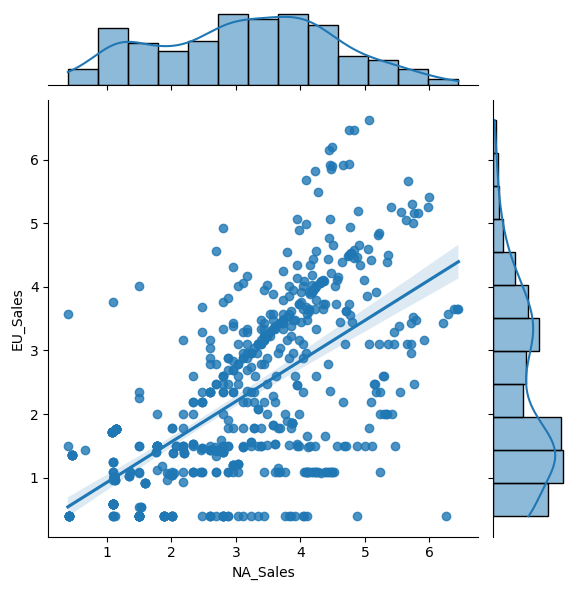

In [ ]:
sns.jointplot(x='NA_Sales',y='EU_Sales',kind='reg',data=top3_data)
plt.show()

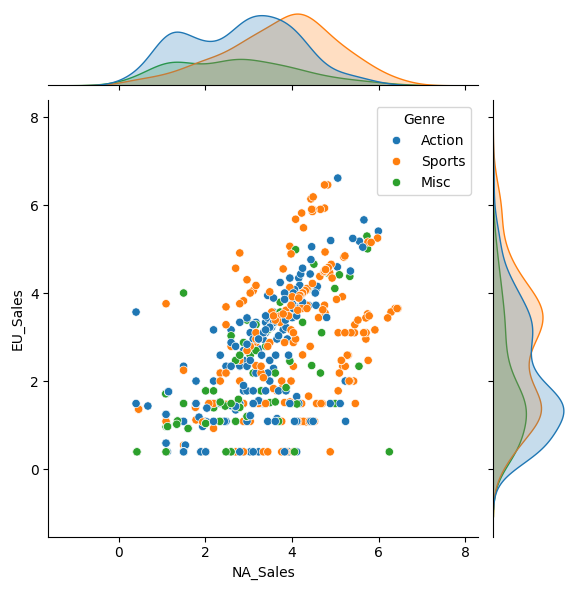

In [ ]:
sns.jointplot(x='NA_Sales',y='EU_Sales',hue='Genre',data=top3_data)
plt.show()

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from pathlib import Path

In [ ]:
plt.rcParams.update({
    "figure.figsize": (10,5),
    "axes.spines.right": False,
    "axes.spines.top": False,
    "font.size": 11,
    "lines.linewidth": 2,
    "axes.grid": True,
    "grid.linestyle": "--",
    "grid.alpha": 0.4
})

In [ ]:
np.random.seed(42)
months = pd.date_range("2024-01-01", periods=12, freq='M')
regions = ["North", "South", "West"]

rows = []
for r in regions:
    base = {"North": 400, "South": 300, "West": 220}[r]
    for m in months:
        sales = max(0, np.random.normal(base + (m.month-1)*12, 40))
        returns = max(0, np.random.normal(sales*0.06, 8))
        promo = np.random.choice([0, 500, 1500], p=[0.6, 0.25, 0.15])  # occasional promotions
        rows.append({"month": m, "region": r, "sales": round(sales,2), "returns": round(returns,2), "promo_spend": promo})

df = pd.DataFrame(rows)
df['month_str'] = df['month'].dt.strftime('%b')
df.head(8)

/tmp/ipython-input-2049623318.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  months = pd.date_range("2024-01-01", periods=12, freq='M')


,month,region,sales,returns,promo_spend,month_str
0,2024-01-31,North,419.87,24.09,500,Jan
1,2024-02-29,North,367.52,24.60,0,Feb
2,2024-03-31,North,487.17,35.37,0,Mar
3,2024-04-30,North,412.76,20.56,0,Apr
4,2024-05-31,North,457.68,12.15,0,May
5,2024-06-30,North,492.66,17.37,0,Jun
6,2024-07-31,North,435.68,14.84,0,Jul
7,2024-08-31,North,458.82,32.31,0,Aug


In [ ]:
monthly_totals = df.groupby('month').agg({
    'sales':'sum',
    'returns':'sum',
    'promo_spend':'sum'
}).reset_index()
monthly_totals['month_str'] = monthly_totals['month'].dt.strftime('%b')
monthly_totals

,month,sales,returns,promo_spend,month_str
0,2024-01-31,987.24,43.21,1000,Jan
1,2024-02-29,1082.47,79.75,0,Feb
2,2024-03-31,979.92,72.88,0,Mar
3,2024-04-30,907.65,45.92,0,Apr
4,2024-05-31,1046.46,58.79,0,May
5,2024-06-30,1055.87,58.19,500,Jun
6,2024-07-31,1040.26,52.00,1500,Jul
7,2024-08-31,1190.16,92.56,2000,Aug
8,2024-09-30,1131.46,70.40,3500,Sep
9,2024-10-31,1214.53,90.66,1500,Oct


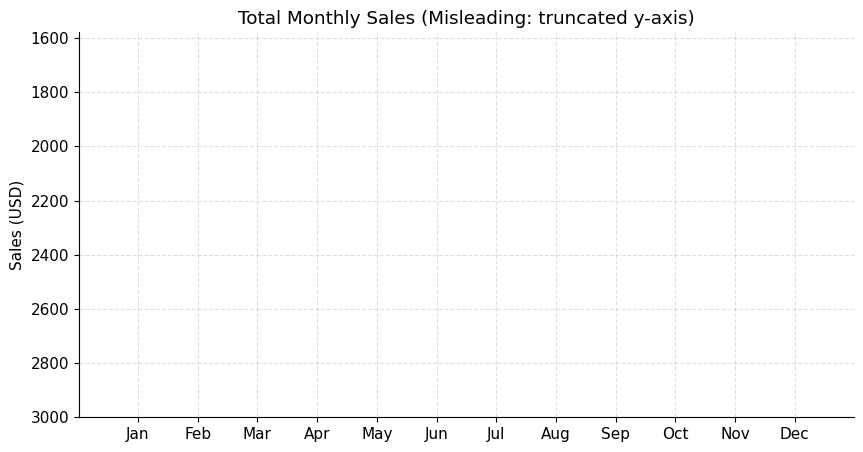

In [ ]:
fig, ax = plt.subplots()
ax.bar(monthly_totals['month_str'], monthly_totals['sales'])
ax.set_title("Total Monthly Sales (Misleading: truncated y-axis)")
ax.set_ylabel("Sales (USD)")
ax.set_ylim(3000, monthly_totals['sales'].max()+200)  # BAD: artificially raised min
plt.show()

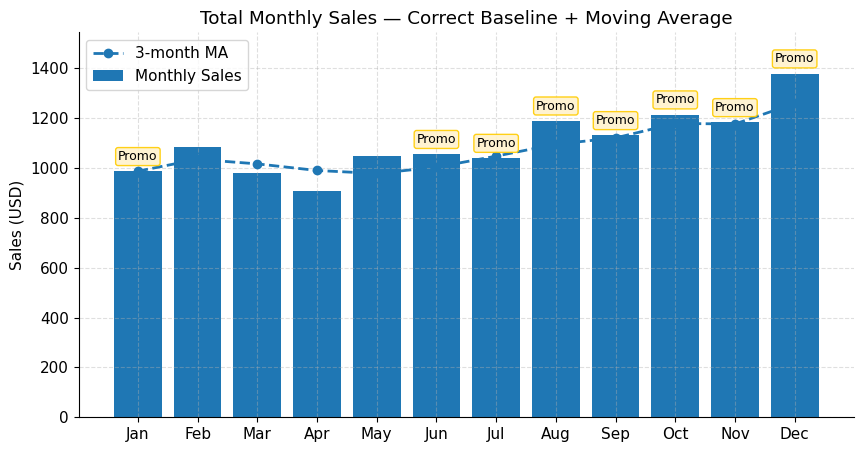

In [ ]:
#solution:
#a. start y axis at zero
#b. show moving average to reveal trend

# Fix: zero baseline, moving average, annotation
fig, ax = plt.subplots()
ax.bar(monthly_totals['month_str'], monthly_totals['sales'], label='Monthly Sales')
ax.plot(monthly_totals['month_str'], monthly_totals['sales'].rolling(3, min_periods=1).mean(),
        marker='o', label='3-month MA', linestyle='--')

ax.set_ylim(0, monthly_totals['sales'].max()*1.12)
ax.set_ylabel("Sales (USD)")
ax.set_title("Total Monthly Sales — Correct Baseline + Moving Average")
ax.legend()

# annotate months with promotions
promo_months = monthly_totals[monthly_totals['promo_spend']>0]
for _, row in promo_months.iterrows():
    ax.annotate("Promo", (row['month_str'], row['sales']), textcoords="offset points", xytext=(0,8),
                ha='center', fontsize=9, bbox=dict(boxstyle="round,pad=0.2", fc="#fff2cc", ec="#ffcc00", alpha=0.9))
plt.show()


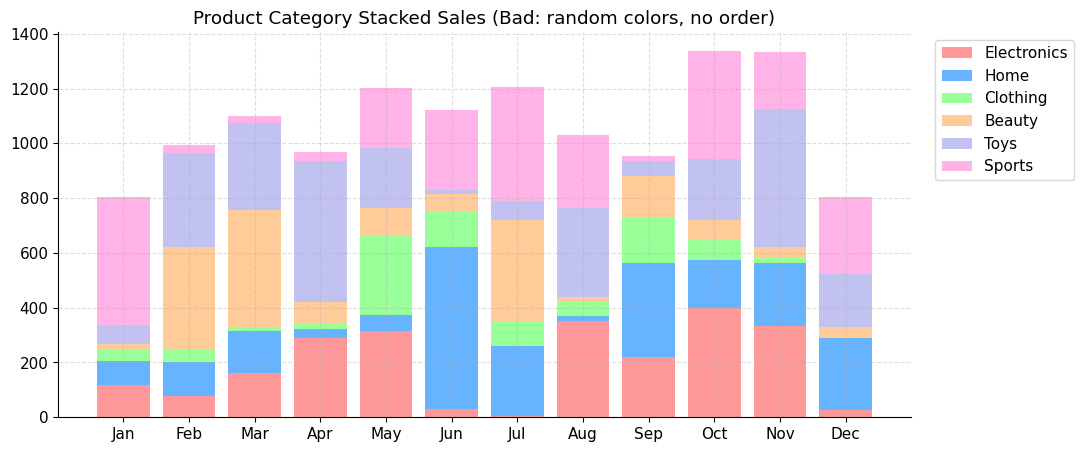

In [ ]:
# Create product category breakdown (synthetic) and a bad stacked bar chart
cats = ['Electronics','Home','Clothing','Beauty','Toys','Sports']
rows=[]
for m in months:
    total = np.random.uniform(800,1400)
    shares = np.random.dirichlet(np.ones(len(cats)))
    for c,s in zip(cats, shares):
        rows.append({'month':m, 'cat':c, 'value': total*s})
cat_df = pd.DataFrame(rows)
cat_pivot = cat_df.pivot_table(index='month', columns='cat', values='value').reset_index()
cat_pivot['month_str'] = cat_pivot['month'].dt.strftime('%b')

# Bad stacked chart: random colors, no order
fig, ax = plt.subplots(figsize=(11,5))
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99','#c2c2f0','#ffb3e6']
bottom = np.zeros(len(cat_pivot))
for i,c in enumerate(cats):
    ax.bar(cat_pivot['month_str'], cat_pivot[c], bottom=bottom, color=colors[i], label=c)
    bottom += cat_pivot[c].values

ax.set_title("Product Category Stacked Sales (Bad: random colors, no order)")
ax.legend(bbox_to_anchor=(1.02,1), loc='upper left')
plt.show()


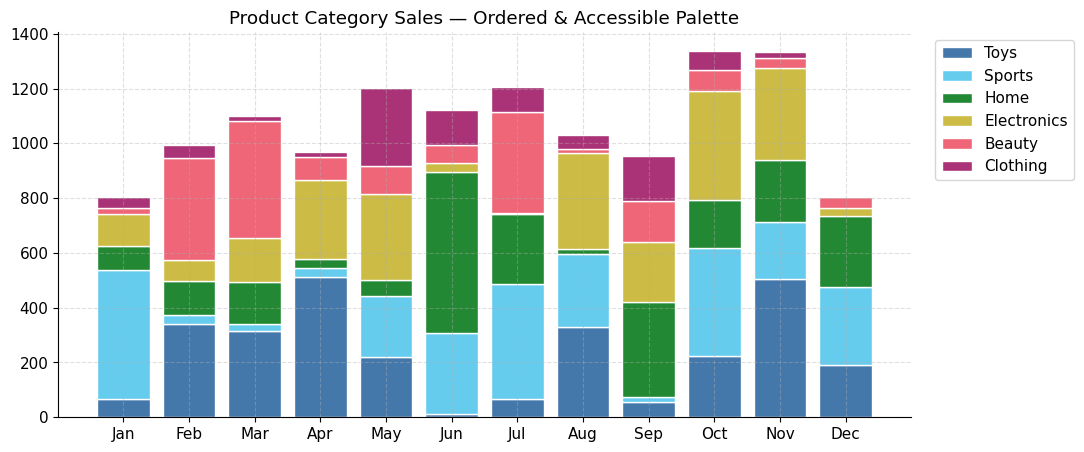

In [ ]:
# Determine order by avg contribution
avg_contrib = cat_df.groupby('cat')['value'].mean().sort_values(ascending=False)
ordered_cats = avg_contrib.index.tolist()

# Plot improved stacked bars
fig, ax = plt.subplots(figsize=(11,5))
bottom = np.zeros(len(cat_pivot))
# Colorblind-friendly palette (six distinct colors)
cb_palette = ['#4477AA','#66CCEE','#228833','#CCBB44','#EE6677','#AA3377']
for i,c in enumerate(ordered_cats):
    ax.bar(cat_pivot['month_str'], cat_pivot[c], bottom=bottom, label=c, color=cb_palette[i], edgecolor='white')
    bottom += cat_pivot[c].values

ax.set_title("Product Category Sales — Ordered & Accessible Palette")
ax.legend(bbox_to_anchor=(1.02,1), loc='upper left')
plt.show()

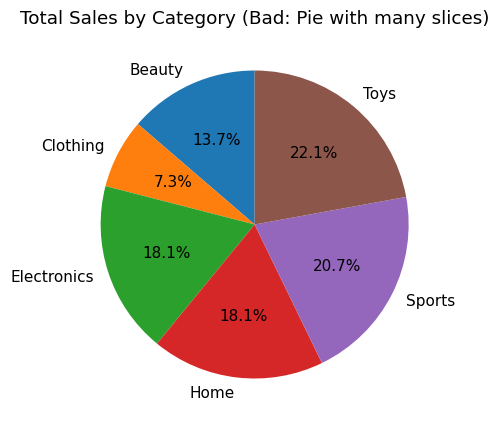

In [ ]:
# Bad pie: too many categories, labels overlapping
fig, ax = plt.subplots()
sums = cat_df.groupby('cat')['value'].sum()
ax.pie(sums, labels=sums.index, autopct='%1.1f%%', startangle=90)
ax.set_title("Total Sales by Category (Bad: Pie with many slices)")
plt.show()


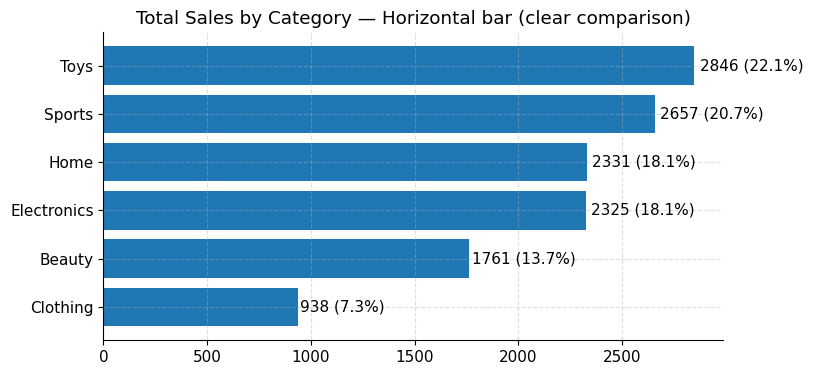

In [ ]:
fig, ax = plt.subplots(figsize=(8,4))
sums_sorted = sums.sort_values(ascending=True)
ax.barh(sums_sorted.index, sums_sorted.values)
for i,(val,name) in enumerate(zip(sums_sorted.values, sums_sorted.index)):
    ax.text(val*1.01, i, f"{val:.0f} ({val/sums_sorted.sum()*100:.1f}%)", va='center')
ax.set_title("Total Sales by Category — Horizontal bar (clear comparison)")
plt.show()


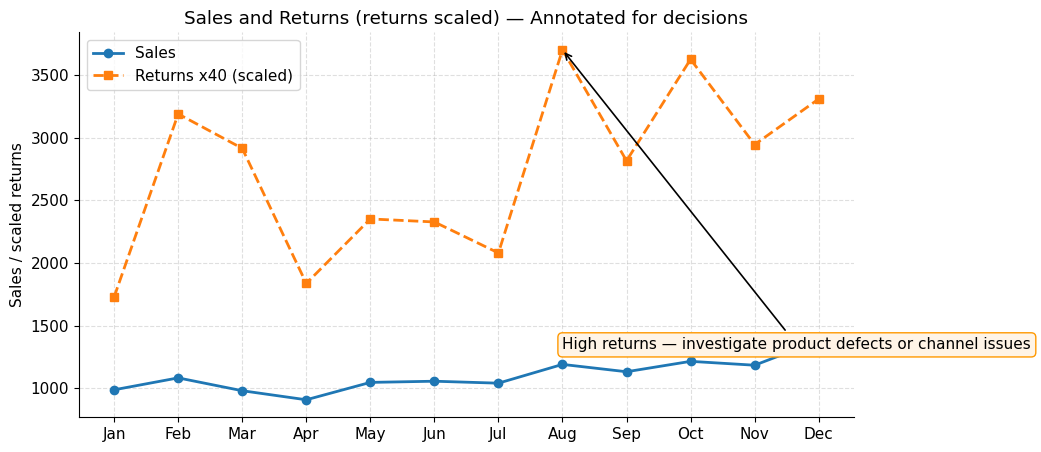

In [ ]:
# Identify month with high returns / low conversion (example)
month_with_high_returns = monthly_totals.loc[monthly_totals['returns'].idxmax()]
fig, ax = plt.subplots()
ax.plot(monthly_totals['month_str'], monthly_totals['sales'], marker='o', label='Sales')
ax.plot(monthly_totals['month_str'], monthly_totals['returns']*40, marker='s', linestyle='--', label='Returns x40 (scaled)')
ax.set_title("Sales and Returns (returns scaled) — Annotated for decisions")
ax.set_ylabel("Sales / scaled returns")
ax.legend()

# Add callout
ax.annotate("High returns — investigate product defects or channel issues",
            xy=(month_with_high_returns['month'].strftime('%b'), month_with_high_returns['returns']*40),
            xytext=(month_with_high_returns['month'].strftime('%b'), month_with_high_returns['sales']+120),
            arrowprops=dict(arrowstyle="->", lw=1.2),
            bbox=dict(boxstyle="round,pad=0.3", fc="#fff4e6", ec="#ff9900"))

plt.show()


Saved: /content/chart_exports/final_monthly_sales_300dpi.png /content/chart_exports/final_monthly_sales.svg


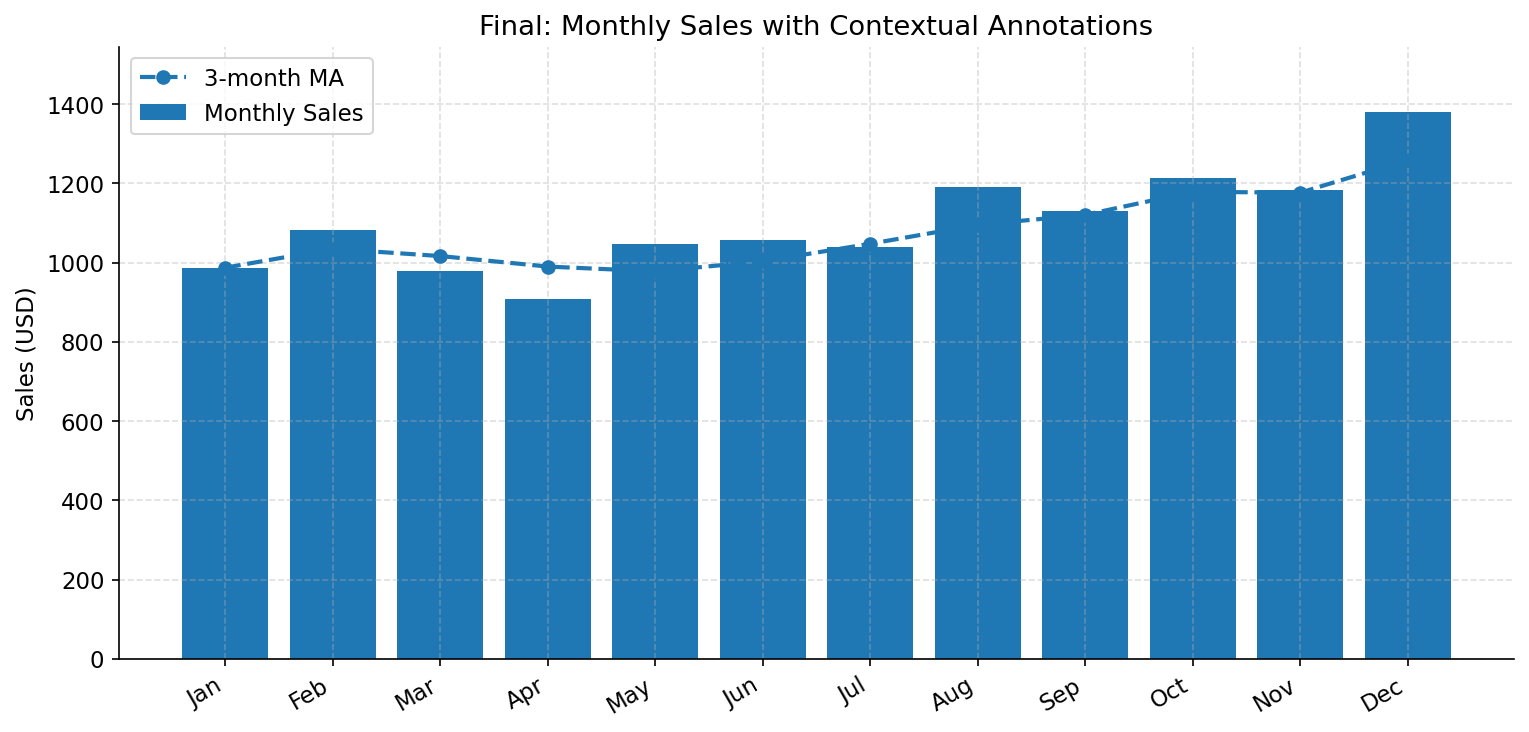

In [ ]:
# Recreate a final clean chart and export

out_dir = Path("/content/chart_exports")
out_dir.mkdir(parents=True, exist_ok=True)

fig, ax = plt.subplots(figsize=(12,6), dpi=150)
ax.bar(monthly_totals['month_str'], monthly_totals['sales'], label='Monthly Sales')
ax.plot(monthly_totals['month_str'], monthly_totals['sales'].rolling(3, min_periods=1).mean(),
        marker='o', label='3-month MA', linestyle='--')

ax.set_ylim(0, monthly_totals['sales'].max()*1.12)
ax.set_ylabel("Sales (USD)")
ax.set_title("Final: Monthly Sales with Contextual Annotations")
ax.legend()
fig.autofmt_xdate(rotation=30)

png_path = out_dir / "final_monthly_sales_300dpi.png"
svg_path = out_dir / "final_monthly_sales.svg"
fig.savefig(png_path, dpi=300, bbox_inches='tight')
fig.savefig(svg_path, bbox_inches='tight')
print("Saved:", png_path, svg_path)
plt.show()